In [1]:
import numpy as np, pandas as pd, os

In [2]:
d0 = 'D:project6 - raw data/'

In [3]:
list_region = os.listdir(d0)
os.listdir(d0)[:5]

['Alberni-Clayoquot.csv',
 'Bulkley-Nechako.csv',
 'Capital.csv',
 'Cariboo.csv',
 'Central Coast.csv']

In [4]:
list_region.index('Nanaimo.csv')

18

In [5]:
os.path.join(d0,list_region[3])

'D:project6 - raw data/Cariboo.csv'

In [6]:
non = pd.read_csv(os.path.join(d0,list_region[18]))
non.head()

,year,Units Collected,Weight Collected (Tonnes)
0,2007,32136000,2441.2
1,2008,34274000,2823.4
2,2009,35586000,3309.8
3,2010,34453000,3574.2
4,2011,33365000,3319.5


In [7]:
pop = pd.read_csv('D:project6 - raw data/total/population_estimates.csv')
pop.head()

,regional_district,year,population
0,British Columbia,1986,3003621
1,British Columbia,1987,3048651
2,British Columbia,1988,3114761
3,British Columbia,1989,3196725
4,British Columbia,1990,3292111


In [8]:
non.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       11 non-null     int64  
 1   Units Collected            11 non-null     int64  
 2   Weight Collected (Tonnes)  11 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 392.0 bytes


In [9]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   regional_district  990 non-null    object
 1   year               990 non-null    int64 
 2   population         990 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 23.3+ KB


In [10]:
pop['regional_district'].value_counts()[:4]

Nanaimo              33
Squamish-Lillooet    33
Stikine              33
Central Okanagan     33
Name: regional_district, dtype: int64

In [11]:
pop['regional_district'].value_counts().index

Index(['Nanaimo', 'Squamish-Lillooet', 'Stikine', 'Central Okanagan',
       'Sunshine Coast', 'Central Kootenay', 'Fraser-Fort George',
       'Powell River', 'Cowichan Valley', 'Alberni-Clayoquot',
       'Metro Vancouver', 'East Kootenay', 'Central Coast', 'Fraser Valley',
       'North Okanagan', 'North Coast', 'Kitimat-Stikine', 'Capital',
       'Okanagan-Similkameen', 'Bulkley-Nechako', 'Kootenay-Boundary',
       'Comox Valley', 'Peace River', 'Columbia-Shuswap', 'Thompson-Nicola',
       'Cariboo', 'Northern Rockies', 'Strathcona', 'Mount Waddington',
       'British Columbia'],
      dtype='object')

In [12]:
list_region2 = [i.split('.')[0] for i in list_region]
list_region2[:4]

['Alberni-Clayoquot', 'Bulkley-Nechako', 'Capital', 'Cariboo']

In [13]:
sum([1 for i in list_region2 if i in pop['regional_district'].value_counts().index])

26

In [14]:
len(list_region)

30

In [15]:
[i for i in list_region2 if i not in pop['regional_district'].value_counts().index]

['Comox-Strathcona', 'Comox', 'Skeena-Queen Charlotte', 'total']

In [16]:
sorted(pop['regional_district'].unique())

['Alberni-Clayoquot',
 'British Columbia',
 'Bulkley-Nechako',
 'Capital',
 'Cariboo',
 'Central Coast',
 'Central Kootenay',
 'Central Okanagan',
 'Columbia-Shuswap',
 'Comox Valley',
 'Cowichan Valley',
 'East Kootenay',
 'Fraser Valley',
 'Fraser-Fort George',
 'Kitimat-Stikine',
 'Kootenay-Boundary',
 'Metro Vancouver',
 'Mount Waddington',
 'Nanaimo',
 'North Coast',
 'North Okanagan',
 'Northern Rockies',
 'Okanagan-Similkameen',
 'Peace River',
 'Powell River',
 'Squamish-Lillooet',
 'Stikine',
 'Strathcona',
 'Sunshine Coast',
 'Thompson-Nicola']

In [17]:
list_region_name = [i for i in list_region2 if i in pop['regional_district'].value_counts().index]

In [18]:
list_region_name[:4]

['Alberni-Clayoquot', 'Bulkley-Nechako', 'Capital', 'Cariboo']

In [19]:
list_region_csv = [i+'.csv' for i in list_region_name]
list_region_csv[:4]

['Alberni-Clayoquot.csv', 'Bulkley-Nechako.csv', 'Capital.csv', 'Cariboo.csv']

### merging pop data with Nanaimo data

In [20]:
# list of all year availabe in cities files

In [21]:
non_year = pd.read_csv(os.path.join(d0+list_region_csv[16]))['year'].unique()

In [22]:
non_year

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [23]:
pop1 = pop[pop['year'].isin(non_year)]
pop1.head(6)

,regional_district,year,population
21,British Columbia,2007,4290984
22,British Columbia,2008,4349336
23,British Columbia,2009,4410506
24,British Columbia,2010,4465546
25,British Columbia,2011,4502104
26,British Columbia,2012,4566769


In [24]:
list_region_name.index('Nanaimo')

16

In [25]:
pop_non = pop1[pop1['regional_district']==list_region_name[16]]
pop_non.head()

,regional_district,year,population
318,Nanaimo,2007,142207
319,Nanaimo,2008,144547
320,Nanaimo,2009,146271
321,Nanaimo,2010,147464
322,Nanaimo,2011,148877


In [26]:
pd.merge(pop_non,pd.read_csv(os.path.join(d0+list_region_csv[16])),on='year' , how='inner')

,regional_district,year,population,Units Collected,Weight Collected (Tonnes)
0,Nanaimo,2007,142207,32136000,2441.2
1,Nanaimo,2008,144547,34274000,2823.4
2,Nanaimo,2009,146271,35586000,3309.8
3,Nanaimo,2010,147464,34453000,3574.2
4,Nanaimo,2011,148877,33365000,3319.5
5,Nanaimo,2012,150017,32918000,3287.6
6,Nanaimo,2013,152158,33033000,3315.6
7,Nanaimo,2014,155118,33487000,-99999.0
8,Nanaimo,2015,158143,35765000,3508.7
9,Nanaimo,2016,162617,35632000,3505.0


In [27]:
os.path.join(d0,list_region_csv[0])

'D:project6 - raw data/Alberni-Clayoquot.csv'

In [28]:
os.path.join(d0,list_region_csv[16])

'D:project6 - raw data/Nanaimo.csv'

In [29]:
pd.read_csv(os.path.join(d0,list_region_csv[16])).head()

,year,Units Collected,Weight Collected (Tonnes)
0,2007,32136000,2441.2
1,2008,34274000,2823.4
2,2009,35586000,3309.8
3,2010,34453000,3574.2
4,2011,33365000,3319.5


In [30]:
x = os.path.join(d0,list_region_csv[0])
print(x)

D:project6 - raw data/Alberni-Clayoquot.csv


In [31]:
pd.read_csv(x).head()

,measure,year,value
0,Units Collected,2007,9138000.0
1,Weight Collected (Tonnes),2007,607.4
2,Units Collected,2008,9921000.0
3,Weight Collected (Tonnes),2008,695.0
4,Units Collected,2009,10037000.0


In [32]:
pd.pivot_table(data = pd.read_csv(os.path.join(d0,list_region_csv[0])),index='year',columns='measure',values='value',aggfunc='sum')

measure,Units Collected,Weight Collected (Tonnes)
year,,
2007,9138000.0,607.4
2008,9921000.0,695.0
2009,10037000.0,787.6
2010,9682000.0,787.8
2011,9185000.0,712.5
2012,9081000.0,704.9
2013,8829000.0,-99999.0
2014,9194000.0,746.5
2015,9685000.0,787.4


In [33]:
list_region_csv

['Alberni-Clayoquot.csv',
 'Bulkley-Nechako.csv',
 'Capital.csv',
 'Cariboo.csv',
 'Central Coast.csv',
 'Central Kootenay.csv',
 'Central Okanagan.csv',
 'Columbia-Shuswap.csv',
 'Cowichan Valley.csv',
 'East Kootenay.csv',
 'Fraser Valley.csv',
 'Fraser-Fort George.csv',
 'Kitimat-Stikine.csv',
 'Kootenay-Boundary.csv',
 'Metro Vancouver.csv',
 'Mount Waddington.csv',
 'Nanaimo.csv',
 'North Okanagan.csv',
 'Northern Rockies.csv',
 'Okanagan-Similkameen.csv',
 'Peace River.csv',
 'Powell River.csv',
 'Squamish-Lillooet.csv',
 'Strathcona.csv',
 'Sunshine Coast.csv',
 'Thompson-Nicola.csv']

In [34]:
sum([1 for i in pd.read_csv(x).columns if i=='measure'])

1

In [35]:
df1 = pd.pivot_table(data = pd.read_csv(os.path.join(d0,list_region_csv[0])),index='year',columns='measure',values='value',aggfunc='sum')

In [36]:
df1

measure,Units Collected,Weight Collected (Tonnes)
year,,
2007,9138000.0,607.4
2008,9921000.0,695.0
2009,10037000.0,787.6
2010,9682000.0,787.8
2011,9185000.0,712.5
2012,9081000.0,704.9
2013,8829000.0,-99999.0
2014,9194000.0,746.5
2015,9685000.0,787.4


In [37]:
os.path.join(d0,list_region_csv[0])

'D:project6 - raw data/Alberni-Clayoquot.csv'

In [38]:
pd.read_csv(os.path.join(d0,list_region_csv[0]))

,measure,year,value
0,Units Collected,2007,9138000.0
1,Weight Collected (Tonnes),2007,607.4
2,Units Collected,2008,9921000.0
3,Weight Collected (Tonnes),2008,695.0
4,Units Collected,2009,10037000.0
5,Weight Collected (Tonnes),2009,787.6
6,Units Collected,2010,9682000.0
7,Weight Collected (Tonnes),2010,787.8
8,Units Collected,2011,9185000.0
9,Weight Collected (Tonnes),2011,712.5


In [39]:
pop1[pop1['regional_district']==list_region_name[0]]

,regional_district,year,population
351,Alberni-Clayoquot,2007,31008
352,Alberni-Clayoquot,2008,31225
353,Alberni-Clayoquot,2009,31313
354,Alberni-Clayoquot,2010,31303
355,Alberni-Clayoquot,2011,31602
356,Alberni-Clayoquot,2012,31429
357,Alberni-Clayoquot,2013,31458
358,Alberni-Clayoquot,2014,31962
359,Alberni-Clayoquot,2015,31887
360,Alberni-Clayoquot,2016,32305


In [53]:
# df1 = pd.pivot_table(data = pd.read_csv(os.path.join(d0,list_region_csv[0])),index='year',columns='measure',values='value',aggfunc='sum')
pop_sample = pop1[pop1['regional_district']==list_region_name[0]]
final = pd.merge(pop_sample,df1,on='year' , how='inner')
final.head(5)

,regional_district,year,population,Units Collected,Weight Collected (Tonnes)
0,Alberni-Clayoquot,2007,31008,9138000.0,607.4
1,Alberni-Clayoquot,2008,31225,9921000.0,695.0
2,Alberni-Clayoquot,2009,31313,10037000.0,787.6
3,Alberni-Clayoquot,2010,31303,9682000.0,787.8
4,Alberni-Clayoquot,2011,31602,9185000.0,712.5


In [78]:
for i in list_region_name[1:]:
    
    df_pivot = pd.read_csv(d0+i+'.csv')
    if sum([1 for i in pd.read_csv(d0+i+'.csv').columns if i=='measure'])>0:
        df_pivot = pd.pivot_table(data=pd.read_csv(d0+i+'.csv'),index='year',columns='measure',values='value',aggfunc='sum')
    
    pop_sample = pop1[pop1['regional_district']==i]
    
    final = pd.concat([final , pd.merge(pop_sample,df_pivot,how='inner',on='year')] , axis=0)

In [80]:
final.shape

(282, 5)

In [81]:
final2 = final.reset_index().iloc[:,1:]

In [82]:
final2

,regional_district,year,population,Units Collected,Weight Collected (Tonnes)
0,Alberni-Clayoquot,2007,31008,9138000.0,607.4
1,Alberni-Clayoquot,2008,31225,9921000.0,695.0
2,Alberni-Clayoquot,2009,31313,10037000.0,787.6
3,Alberni-Clayoquot,2010,31303,9682000.0,787.8
4,Alberni-Clayoquot,2011,31602,9185000.0,712.5
...,...,...,...,...,...
277,Thompson-Nicola,2013,132477,36689000.0,2880.9
278,Thompson-Nicola,2014,134628,35667000.0,2839.2
279,Thompson-Nicola,2015,136470,36607000.0,2858.2
280,Thompson-Nicola,2016,138535,37289000.0,2906.8


In [83]:
import matplotlib.pyplot as plt

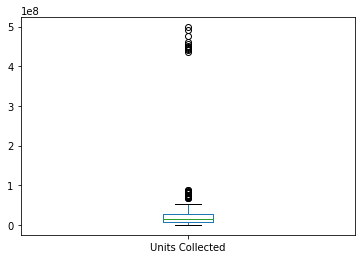

In [84]:
final2['Units Collected'].plot(kind = 'box')
plt.show()

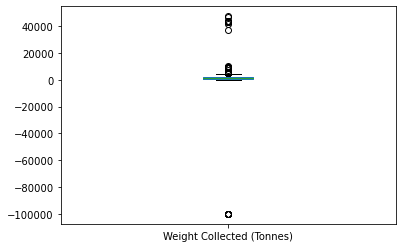

In [85]:
final2['Weight Collected (Tonnes)'].plot(kind = 'box')
plt.show()

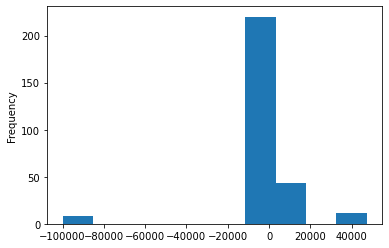

In [87]:
final2['Weight Collected (Tonnes)'].plot(kind = 'hist');

In [90]:
index_drop = final2[final2['Weight Collected (Tonnes)']<0].index
index_drop

Int64Index([6, 10, 183, 230, 264, 265, 266, 268], dtype='int64')

In [91]:
final3 = final2.drop(index_drop , axis=0)

In [93]:
final3[final3['Weight Collected (Tonnes)']<0]

,regional_district,year,population,Units Collected,Weight Collected (Tonnes)


### Report:

In [94]:
final3.head()

,regional_district,year,population,Units Collected,Weight Collected (Tonnes)
0,Alberni-Clayoquot,2007,31008,9138000.0,607.4
1,Alberni-Clayoquot,2008,31225,9921000.0,695.0
2,Alberni-Clayoquot,2009,31313,10037000.0,787.6
3,Alberni-Clayoquot,2010,31303,9682000.0,787.8
4,Alberni-Clayoquot,2011,31602,9185000.0,712.5


In [96]:
final3['can_rate'] = (final3['Units Collected'] / final3['population']).round(2)
final3.head()

,regional_district,year,population,Units Collected,Weight Collected (Tonnes),can_rate
0,Alberni-Clayoquot,2007,31008,9138000.0,607.4,294.70
1,Alberni-Clayoquot,2008,31225,9921000.0,695.0,317.73
2,Alberni-Clayoquot,2009,31313,10037000.0,787.6,320.54
3,Alberni-Clayoquot,2010,31303,9682000.0,787.8,309.30
4,Alberni-Clayoquot,2011,31602,9185000.0,712.5,290.65


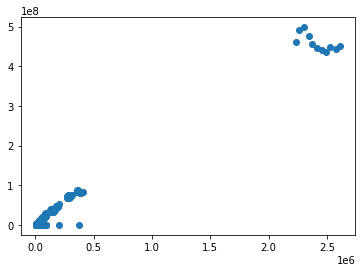

In [117]:
plt.scatter(final3['population'] , final3['Units Collected'])
plt.show()

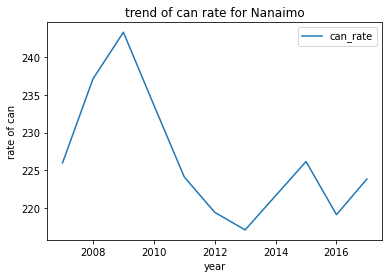

In [105]:
final3[final3['regional_district'] == list_region_name[16]].plot(x = 'year' , y='can_rate');
plt.title('trend of can rate for {}'.format(list_region_name[16]))
plt.xlabel('year')
plt.ylabel('rate of can')
plt.show()

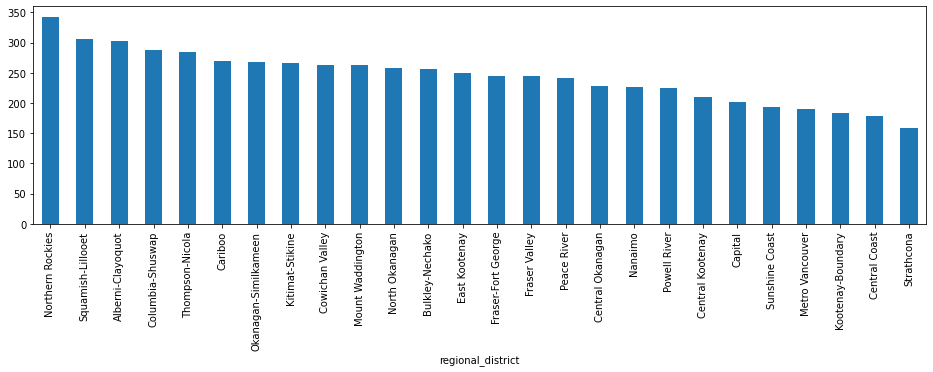

In [114]:
final3.groupby('regional_district').mean()['can_rate'].round(2).sort_values(ascending = False).plot(kind = 'bar', figsize=(16,4));

In [116]:
round(final3['can_rate'].mean() , 2)

245.82